# Assignment #4: Linear Models and Decision Trees
## Foundations of Machine Learning
## Do Q1 and one other question.
### Advice: Reuse your code and code from lectures, package routine tasks into functions, make plans about how you'll carry out the analysis before jumping into writing code, and work as efficiently as possible

**Q1.** This question is a case study for linear models and decision trees. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv 
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

 1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.

In [52]:
import numpy as  np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

df = pd.read_csv('./data/cars_hw.csv') # Load divorce data
df.head()

,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000


In [53]:
df = df[(np.abs(stats.zscore(df['Price']))<3)]
df = df[(np.abs(stats.zscore(df['Mileage_Run']))<3)]
df['Price'] = np.log1p(df['Price'])
df['Mileage_Run'] = np.arcsinh(df['Mileage_Run'])

2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?

<AxesSubplot: ylabel='Density'>

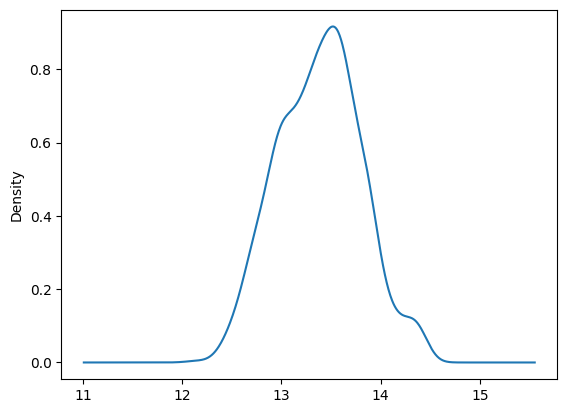

In [54]:
var = 'Price'
df[var].plot.density()

count    951.000000
mean      13.382316
std        0.419113
min       12.144203
25%       13.060490
50%       13.396962
75%       13.664107
max       14.417639
Name: Price, dtype: float64
               count       mean       std        min        25%        50%  \
Make                                                                         
Chevrolet        6.0  12.919898  0.480974  12.495008  12.568395  12.752289   
Datsun           3.0  12.576050  0.036311  12.538971  12.558305  12.577640   
Ford            52.0  13.468282  0.210894  12.577640  13.361382  13.469494   
Honda           73.0  13.536319  0.336971  12.663501  13.272508  13.573440   
Hyundai        305.0  13.368512  0.398781  12.421188  13.091906  13.366095   
Jeep             4.0  14.216591  0.105084  14.070154  14.183271  14.240266   
Kia              8.0  14.292178  0.076877  14.129592  14.272242  14.303106   
MG Motors       15.0  14.375553  0.042433  14.278616  14.348779  14.386491   
Mahindra        18.0  13.898954 

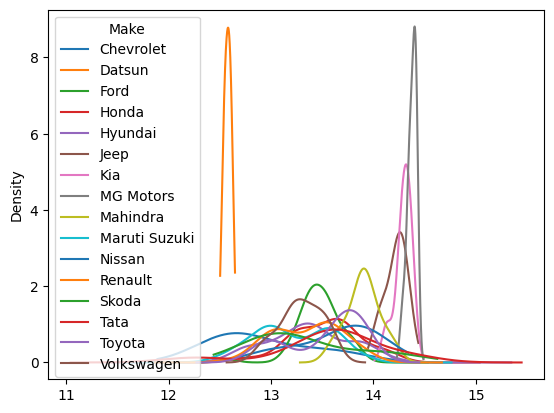

In [55]:
price_summary = df['Price'].describe()

print(price_summary)
make_summary = df.groupby('Make')['Price'].describe()
group_by = 'Make'
df_wide = df.pivot(columns=group_by,values=var)
df_wide.plot.density()

print(make_summary)

The most expensive car brands are Volkswagen, MG Motors and Kia according to the kernel density plot because they have the highest density at the highest prices. In general the average prices of cars are around 14

  3. Split the data into an 80% training set and a 20% testing set.
  4. Let's focus on linear models. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the test set? Make a second model where, for the categorical variables, make a model comprised of one-hot encoded regressors/features alone, and regress price on those variables; what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?

In [56]:
from sklearn.model_selection import train_test_split

# Features of data
X = df.drop('Price', axis=1)
# Target
y = df['Price']  # target

# Split the data into a training set (80%) and a testing set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)

r2 :  0.05668254478231649
RMSE 1:  0.39213017908840764


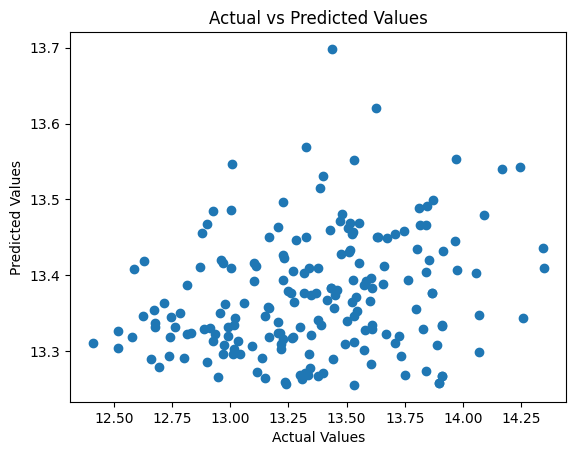

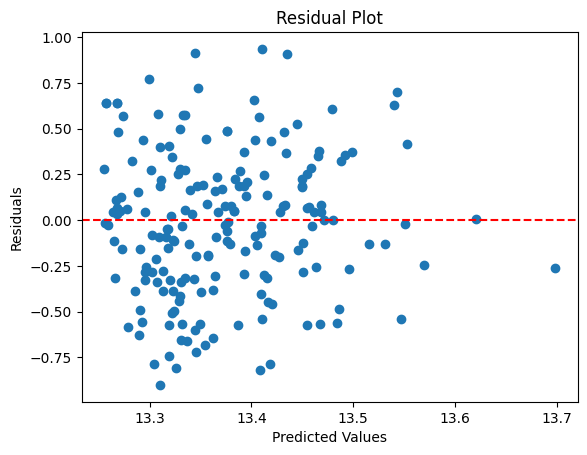

In [57]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


numeric_cols = ['Mileage_Run', 'Seating_Capacity']

X_train_num = X_train[numeric_cols]
X_test_num = X_test[numeric_cols]

model_numeric = LinearRegression()
model_numeric.fit(X_train_num, y_train)


y_pred_num = model_numeric.predict(X_test_num)

r2_numeric = r2_score(y_test, y_pred_num)
rmse_numeric = mean_squared_error(y_test, y_pred_num, squared=False)
print("r2 : ", r2_numeric)
print("RMSE 1: ", rmse_numeric)


# Scatter plot
plt.scatter(y_test, y_pred_num)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# Residual plot
residuals = y_test - y_pred_num
plt.scatter(y_pred_num, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()



RMSE 2:  0.2430540452760889
r2 2:  0.637587605092097


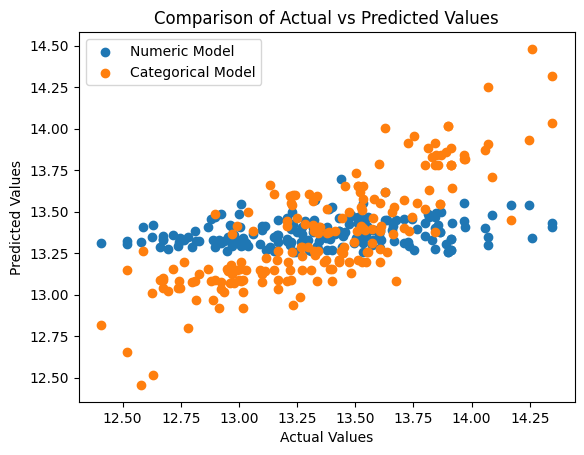

In [58]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_squared_error

categorical_cols = ['Color', 'Body_Type', 'Make', 'Fuel_Type', 'Transmission', 'Transmission_Type', 'No_of_Owners']
encoder = OneHotEncoder(sparse_output=False)
encoded_cat_data = encoder.fit_transform(df[categorical_cols])
encoded_names = encoder.get_feature_names_out(categorical_cols)

zdf = pd.DataFrame(encoded_cat_data, columns = encoded_names)
df = df.drop(columns=categorical_cols)
df = pd.concat([df, zdf], axis=1)

X_train_cat = encoder.fit_transform(X_train[categorical_cols])
X_test_cat = encoder.transform(X_test[categorical_cols])

model_cat = LinearRegression()
model_cat.fit(X_train_cat, y_train)
y_pred_cat = model_cat.predict(X_test_cat)

r2_cat = r2_score(y_test, y_pred_cat)
rmse_cat = mean_squared_error(y_test, y_pred_cat, squared=False)
print("RMSE 2: ", rmse_cat)
print("r2 2: ", r2_cat)
plt.scatter(y_test, y_pred_num, label='Numeric Model')
plt.scatter(y_test, y_pred_cat, label='Categorical Model')
plt.legend()
plt.title('Comparison of Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

The second model had a higher r^2 value which means it better explains the model. An r^2 value closer to 1 means it is the best prediciton of the model. The r^2 value for model 1 was close to 0 so it was not a good predictor of the data. 

In [60]:
X_train_encoded = encoder.fit_transform(X_train[categorical_cols])
X_test_encoded = encoder.transform(X_test[categorical_cols])

X_train_combined = pd.concat([X_train[numeric_cols].reset_index(drop=True),
                              pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out())], axis=1)
X_test_combined = pd.concat([X_test[numeric_cols].reset_index(drop=True),
                             pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out())], axis=1)
model_combined = LinearRegression()
model_combined.fit(X_train_combined, y_train)

y_pred_combined = model_combined.predict(X_test_combined)
r2_combined = r2_score(y_test, y_pred_combined)
rmse_combined = mean_squared_error(y_test, y_pred_combined, squared=False)

print("RMSE: ", rmse_combined)
print("r2 3: ", r2_combined)



RMSE:  0.22624887855075193
r2 3:  0.6859706749801726


The third model is slightly better than the previous because it has a higher r^2 value, so the join model is the best representation of the data. 

5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using, along with the categorical variables. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 3?

Degree 1:
  R^2: 0.0566825447823166
  RMSE: 0.39213017908840764


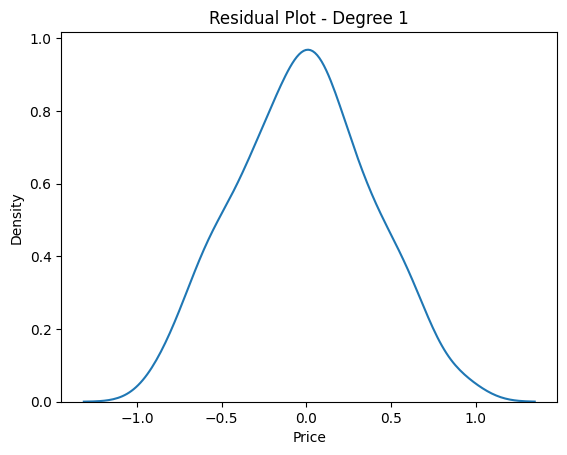

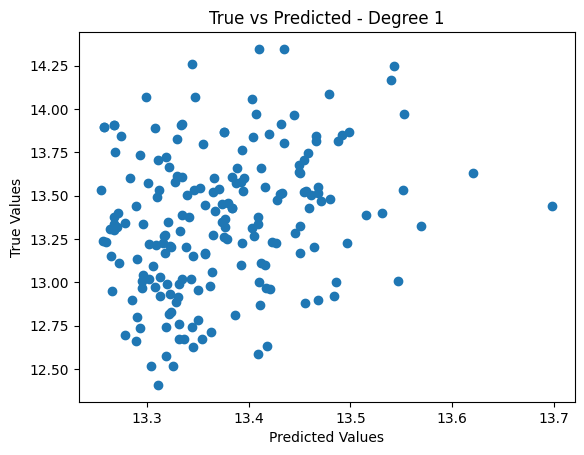

Degree 2:
  R^2: 0.057476420894165714
  RMSE: 0.3919651401059141


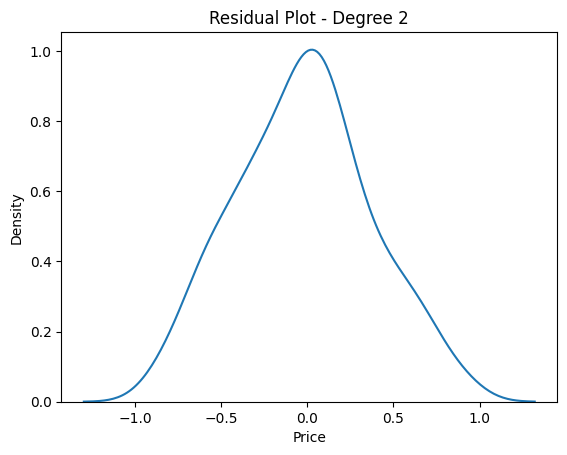

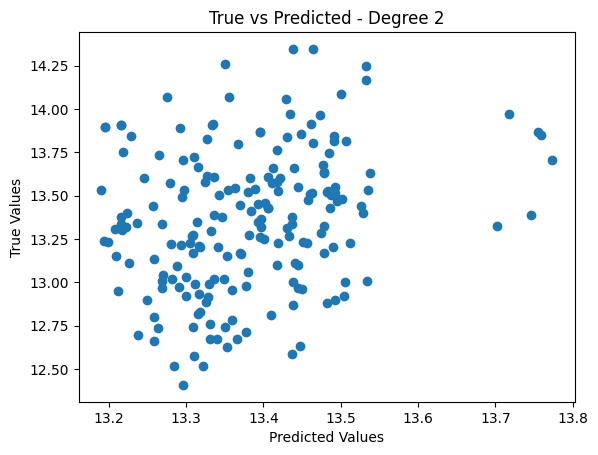

Degree 3:
  R^2: 0.07202580273240577
  RMSE: 0.38892806478508496


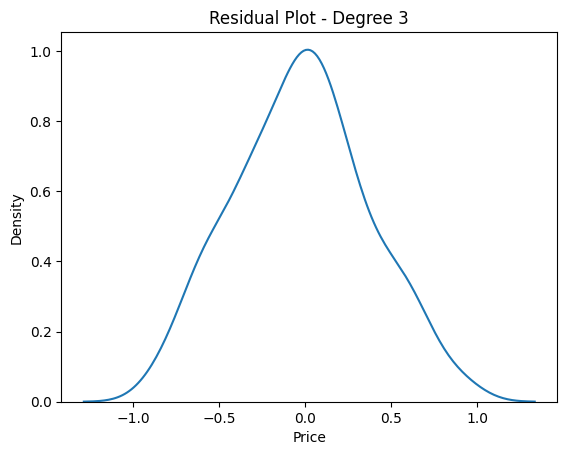

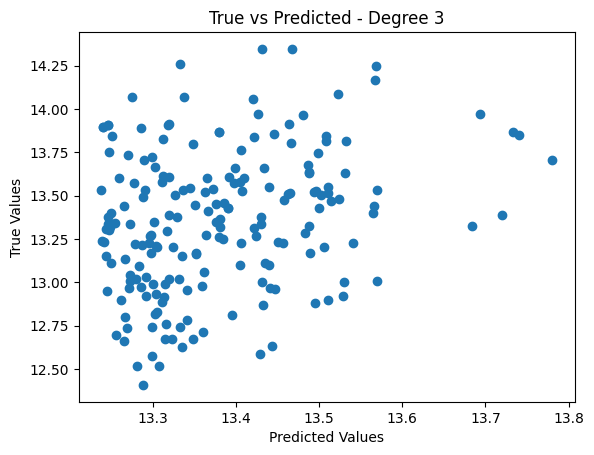

Degree 4:
  R^2: 0.08983426230105285
  RMSE: 0.38517808868694675


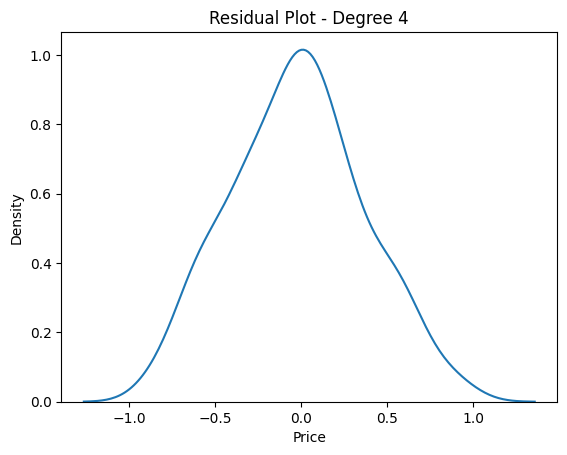

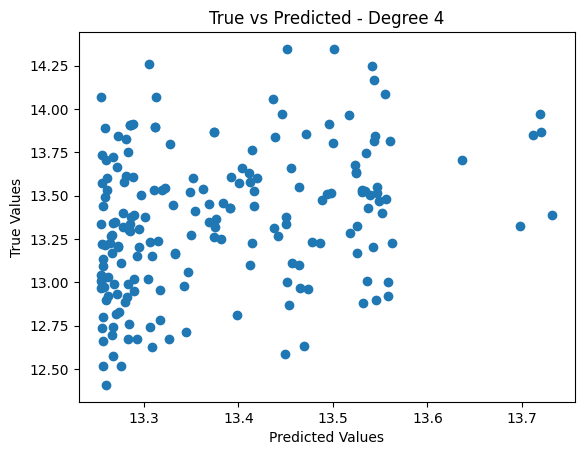

Degree 5:
  R^2: 0.0857333270765187
  RMSE: 0.3860448621946419


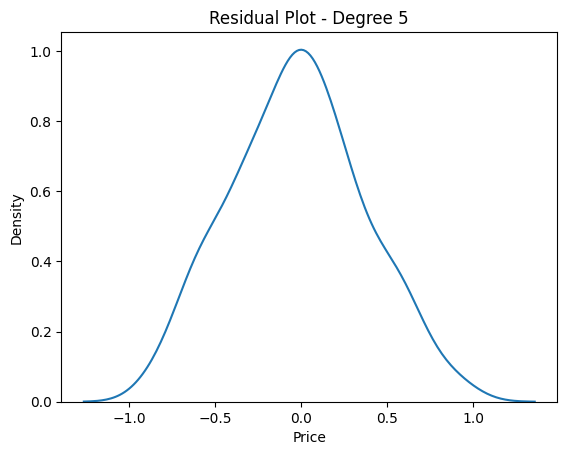

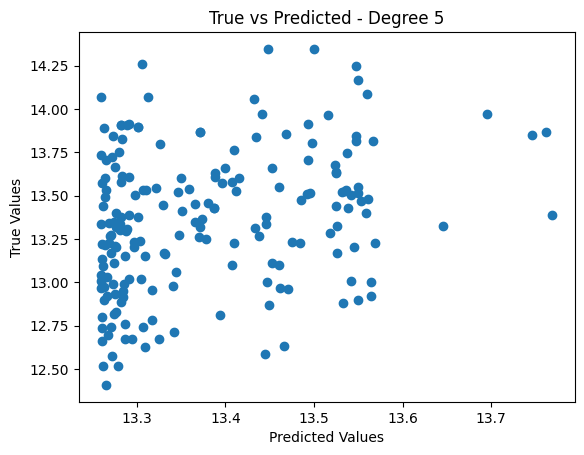

In [65]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

degrees = [1, 2, 3, 4, 5]  # You can extend this list as needed

for degree in degrees:
    # Expand features
    expander = PolynomialFeatures(degree=degree, include_bias=False)

    # Transform the training and test sets
    Z_train = expander.fit_transform(X_train[numeric_cols])
    names_train = expander.get_feature_names_out(numeric_cols)
    X_train_lm = pd.DataFrame(data=Z_train, columns=names_train)

    Z_test = expander.transform(X_test[numeric_cols])
    names_test = expander.get_feature_names_out(numeric_cols)
    X_test_lm = pd.DataFrame(data=Z_test, columns=names_test)

    # Fit the model
    reg = LinearRegression().fit(X_train_lm, y_train)

    # Predict and evaluate on the test set
    y_hat_lm = reg.predict(X_test_lm)
    r2_lm = r2_score(y_test, y_hat_lm)
    rmse_lm = mean_squared_error(y_test, y_hat_lm, squared=False)

    print(f"Degree {degree}:")
    print(f"  R^2: {r2_lm}")
    print(f"  RMSE: {rmse_lm}")

    # Visualizations (you can customize these as needed)
    # Residual plot
    sns.kdeplot(y_test - y_hat_lm)
    plt.title(f"Residual Plot - Degree {degree}")
    plt.show()

    # True versus predicted plot
    plt.scatter(x=y_hat_lm, y=y_test)
    plt.title(f"True vs Predicted - Degree {degree}")
    plt.xlabel("Predicted Values")
    plt.ylabel("True Values")
    plt.show()


The R^2 never goes negative for any of the degrees. As the degree of expansion decreases, the R^2 increases, the RMSE value stays relatively the same. 

  6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.

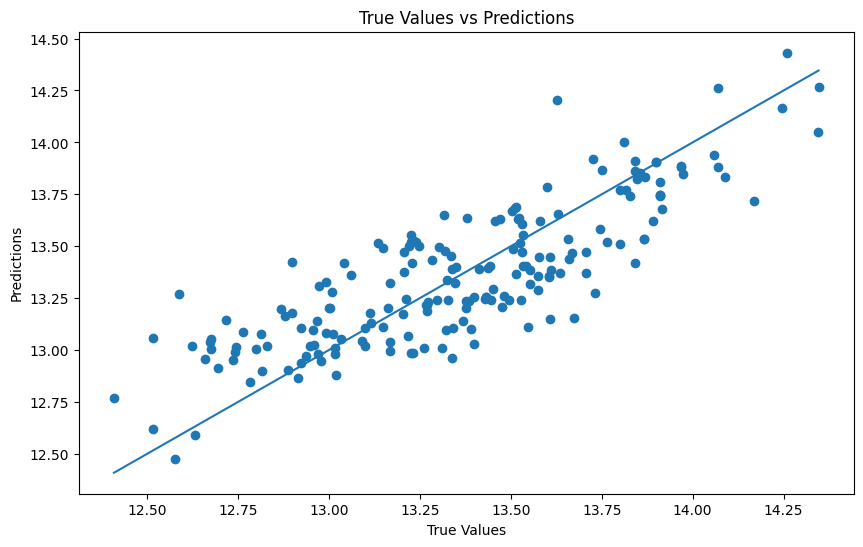

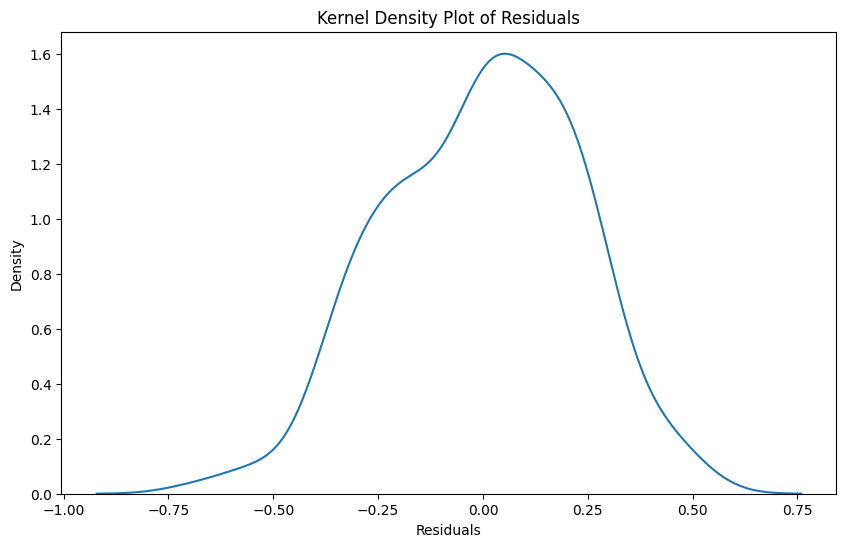

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the residuals
residuals = y_test - y_pred_combined

# Plot true values vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_combined)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs Predictions')
plt.show()

# Kernel density plot of the residuals
plt.figure(figsize=(10, 6))
sns.kdeplot(residuals)
plt.title('Kernel Density Plot of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()

 7. Now, let's use a regression tree. Construct an appropriate matrix of regressors/features, and fit a tree to the data. Vary the maximum depth of the decision tree using the `max_depth` option (i.e. `tree.DecisionTreeRegressor(max_depth=D)`), and compute the $R^2$ and `RMSE` on the test set of a variety of depths. What depth tree gives the best results?

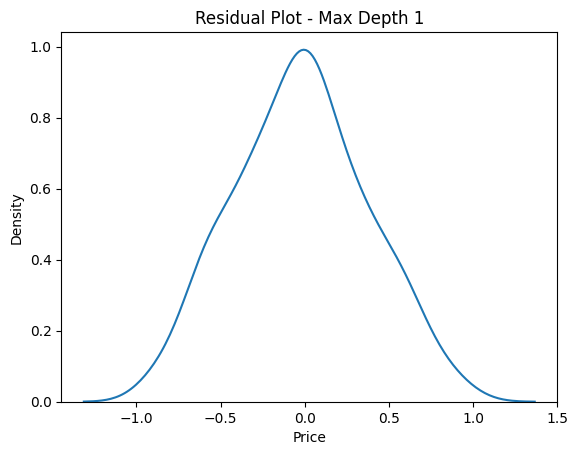

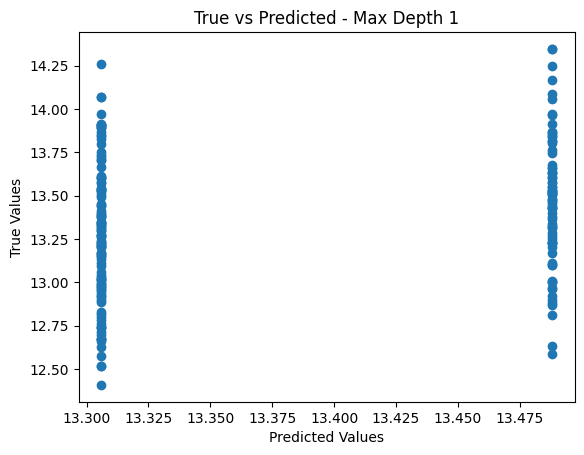

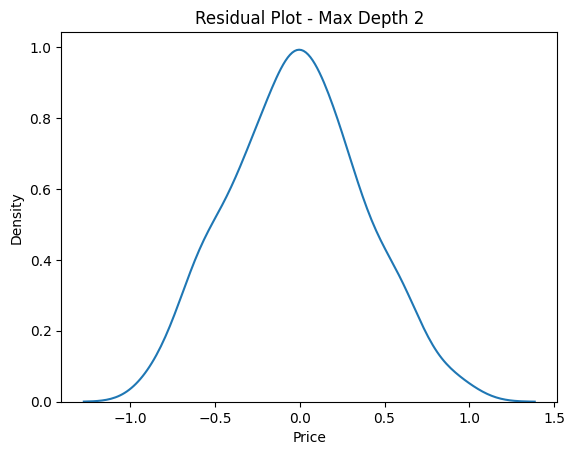

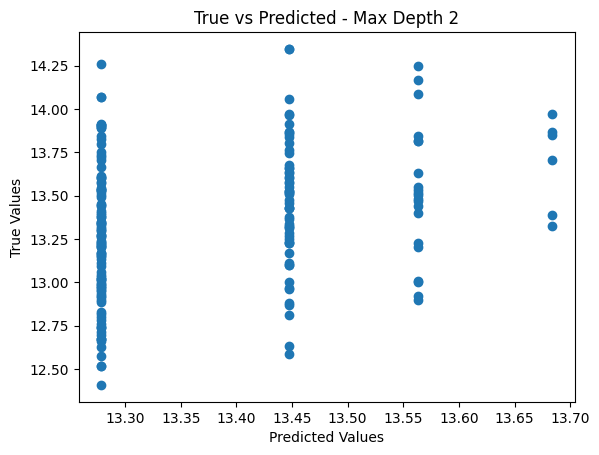

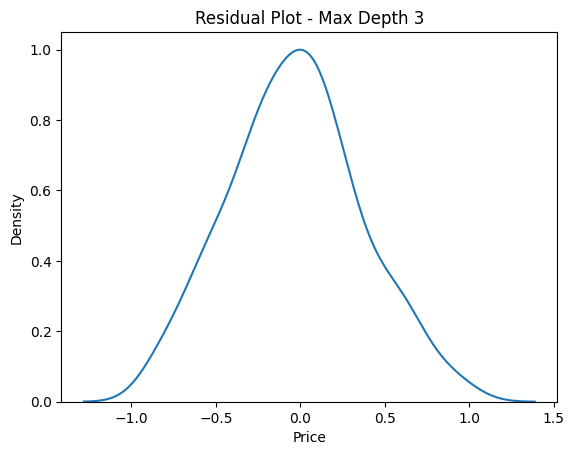

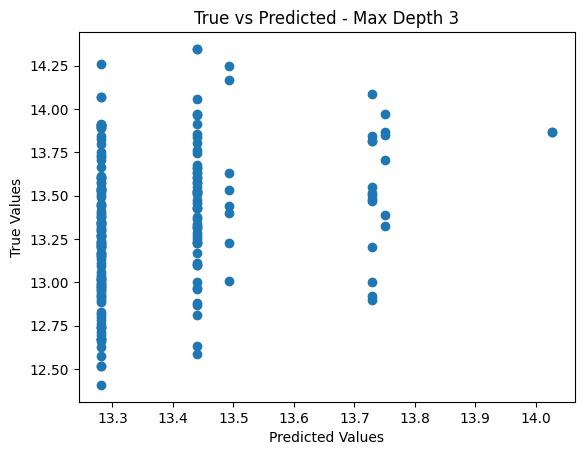

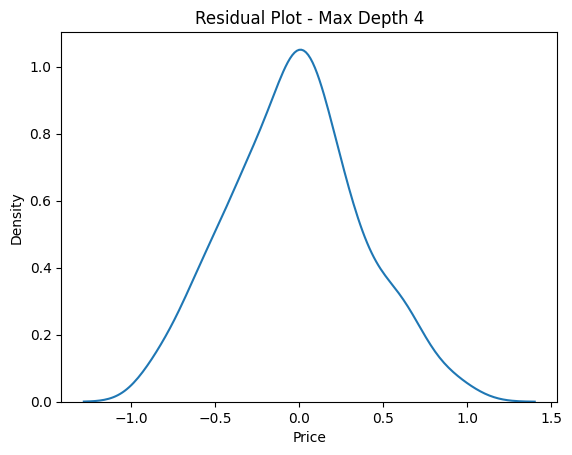

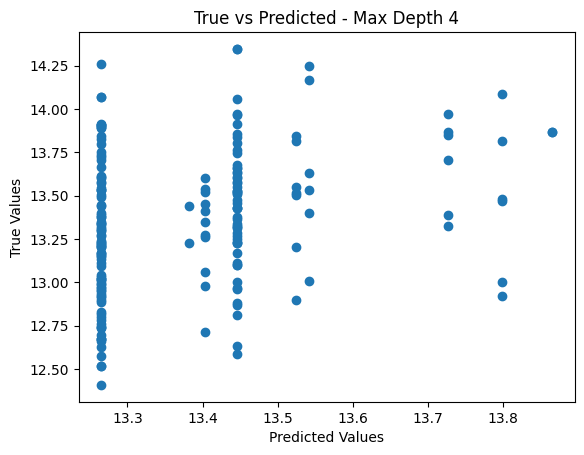

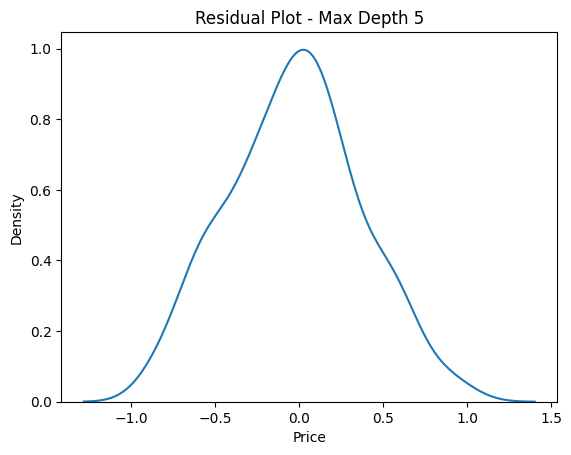

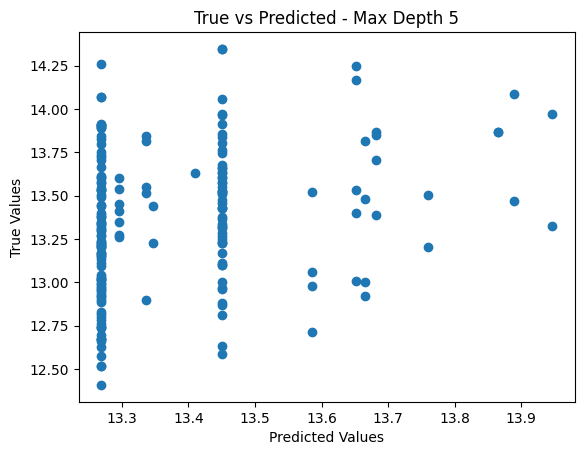

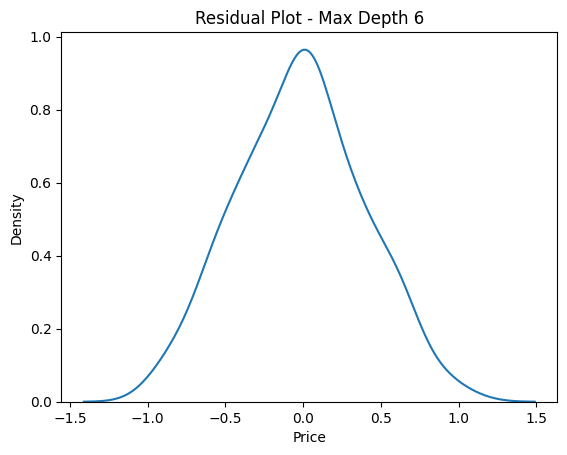

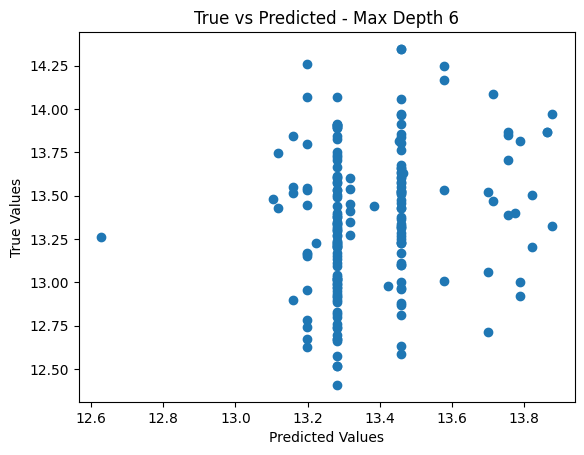

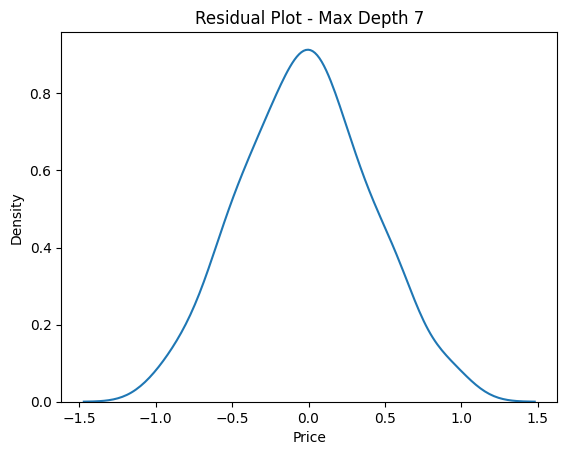

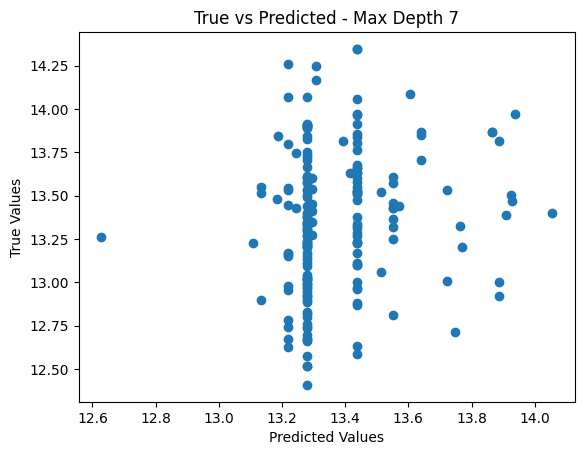

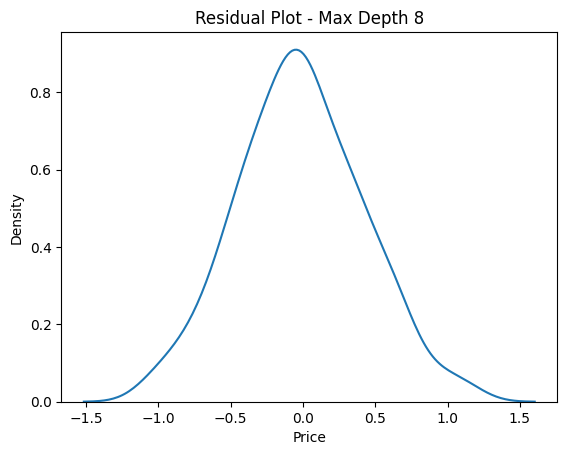

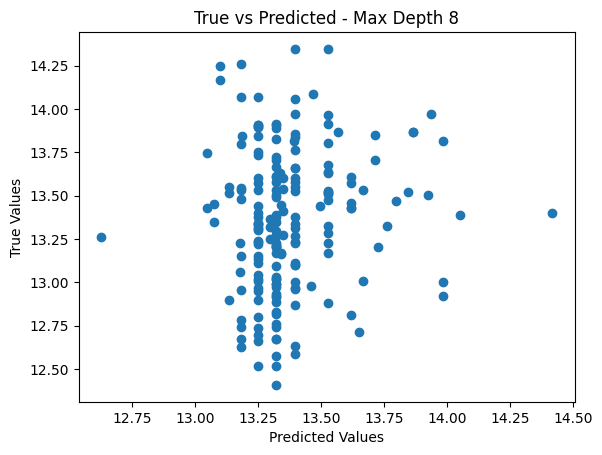

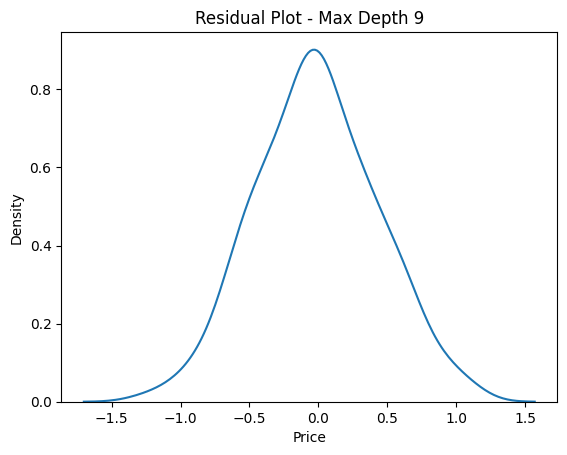

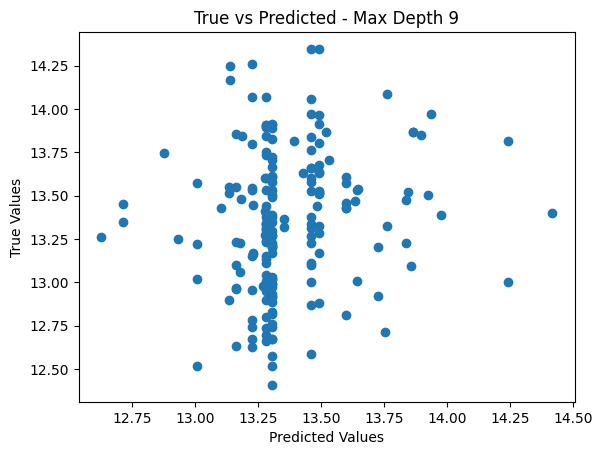

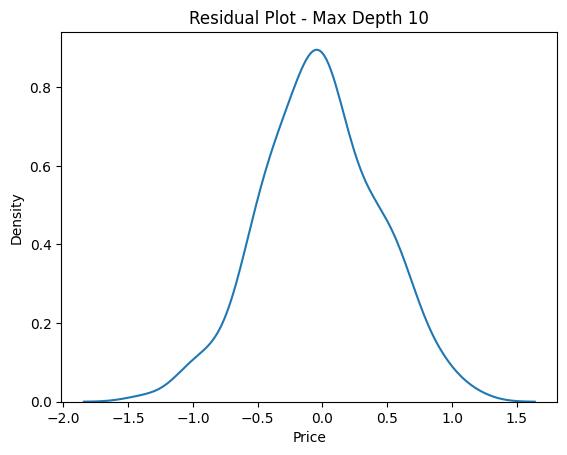

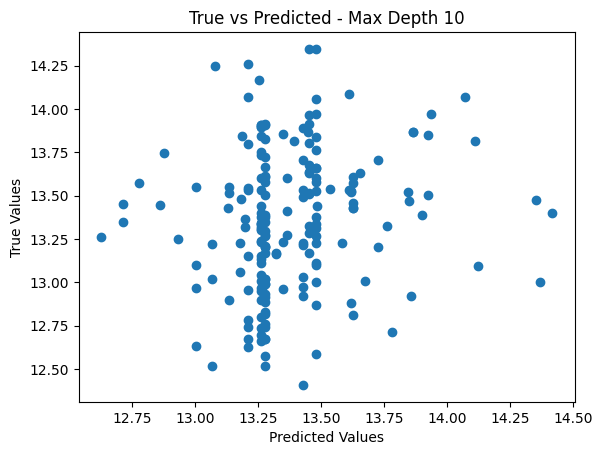

Results for Different Max Depths:
Max Depth 1: R^2 = 0.05243306325745811, RMSE = 0.3930124258352093
Max Depth 2: R^2 = 0.08728599527834024, RMSE = 0.3857169194285424
Max Depth 3: R^2 = 0.06906991388057782, RMSE = 0.38954700123173336
Max Depth 4: R^2 = 0.07901929638410621, RMSE = 0.3874597534985462
Max Depth 5: R^2 = 0.051081972278606225, RMSE = 0.39329251496505935
Max Depth 6: R^2 = -0.011222909967618433, RMSE = 0.4059988304358683
Max Depth 7: R^2 = -0.06920624391793129, RMSE = 0.4174765400630702
Max Depth 8: R^2 = -0.15218693971799446, RMSE = 0.43337395396029593
Max Depth 9: R^2 = -0.17917375231298882, RMSE = 0.4384198751978967
Max Depth 10: R^2 = -0.24245864641948334, RMSE = 0.4500308683069232

Best Max Depth: 2


In [66]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Specify a range of max_depth values to try
depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]  # Adjust as needed

# Initialize lists to store results
r2_scores = []
rmse_scores = []

# Loop over different max_depth values
for depth in depths:
    # Fit the Decision Tree model
    model = DecisionTreeRegressor(max_depth=depth)
    cart = model.fit(X_train, y_train)

    # Make predictions on the test set
    y_hat_cart = cart.predict(X_test)

    # Calculate R-squared and RMSE
    r2_cart = r2_score(y_test, y_hat_cart)
    rmse_cart = mean_squared_error(y_test, y_hat_cart, squared=False)

    # Append results to lists
    r2_scores.append(r2_cart)
    rmse_scores.append(rmse_cart)

    # Visualizations (optional, adjust as needed)
    # Residual plot
    sns.kdeplot(y_test - y_hat_cart)
    plt.title(f"Residual Plot - Max Depth {depth}")
    plt.show()

    # True versus predicted plot
    plt.scatter(x=y_hat_cart, y=y_test)
    plt.title(f"True vs Predicted - Max Depth {depth}")
    plt.xlabel("Predicted Values")
    plt.ylabel("True Values")
    plt.show()

# Find the best max_depth based on R-squared
best_depth = depths[np.argmax(r2_scores)]

# Display results
print(f"Results for Different Max Depths:")
for i, depth in enumerate(depths):
    print(f"Max Depth {depth}: R^2 = {r2_scores[i]}, RMSE = {rmse_scores[i]}")

print(f"\nBest Max Depth: {best_depth}")


 8. For your best tree, determine the predicted values for the test data, and plot them against the true values. Do the predicted values and true values line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero?

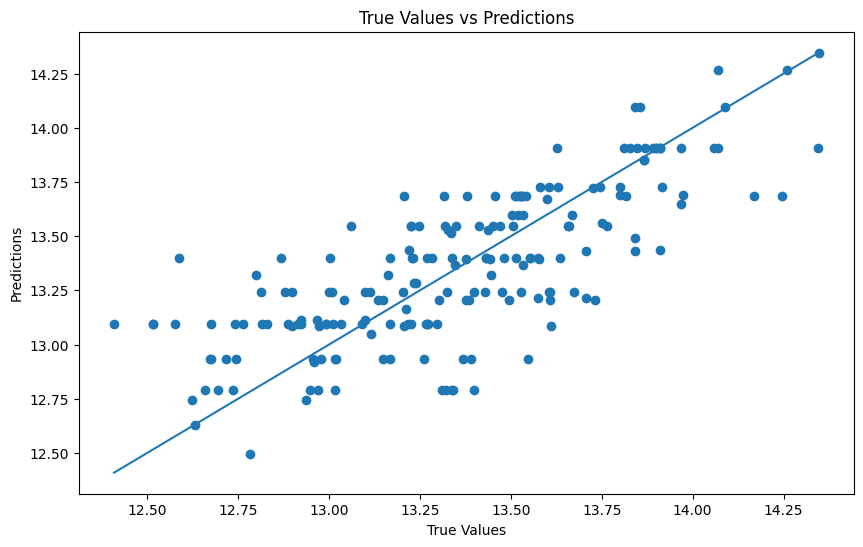

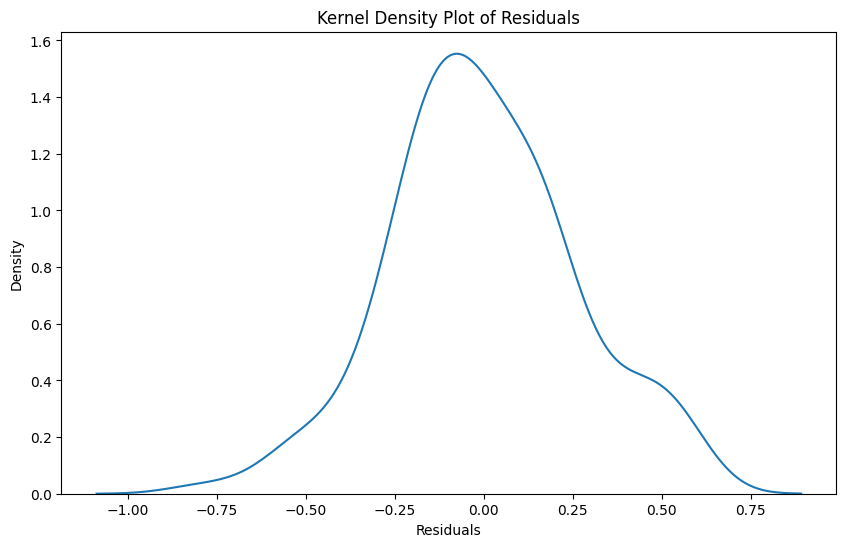

In [67]:
# Part 8 - Find Residuals and KDePlot for Best Depth Tree

best_tree_regressor = DecisionTreeRegressor(max_depth=7, random_state=100)
best_tree_regressor.fit(X_train_combined, y_train)

# Predict on the test set
y_test_pred = best_tree_regressor.predict(X_test_combined)

# Find Residuals
residuals = y_test - y_test_pred

# Plot true values vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs Predictions')
plt.show()

# Kernel density plot of the residuals
plt.figure(figsize=(10, 6))
sns.kdeplot(residuals)
plt.title('Kernel Density Plot of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()

  12. Which model --- linear model or classification and regression tree --- has better performance on the test set?

The best model for the test set was the join model beause it produced the highest R^2 which means it had the most accurate predicitons of the data. It also had fairly low RMSE which means there was least about of deviation from the predicted values vs. the acutal values. 

**Q5.** This is a math question to review the derivation of the OLS estimator (but only if you are into that kind of thing!). We are going to do it slightly differently from what we did in class, though. We will use a linear predictor and minimize the Sum of Squared Errors, just as in class. But, we are going to de-mean $X$ first, creating another variable $z_i = x_i - \bar{x}$ where 
$$
\bar{x} = \dfrac{1}{N} \sum_{i=1}^N x_i,
$$
so the model is $\hat{y}_i = a + b z_i$ and the `SSE` is
$$
\text{SSE}(a,b) = \sum_{i=1}^N (y_i - a - bz_i)^2.
$$

  1. Take partial derivatives of the `SSE` with respect to $a$ and $b$. You should get

\begin{eqnarray*}
\sum_{i=1}^N -2(y_i - a- bz_i) &=& 0 \\
\sum_{i=1}^N -2(y_i - a - bz_i)z_i &=& 0.
\end{eqnarray*}

  2. Solve for the solutions to the above equations. Big hint: $\bar{z} = 0$, since we subtracted the mean of $x$ from $x$ to get $z$. You should get

\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})z_i}{\sum_{i=1}^N z_i^2}.
\end{eqnarray*}

  3. Substitute $z_i = x_i - \bar{x}$ back into the above equations. You should get
  
\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})(x_i-\bar{x})}{\sum_{i=1}^N (x_i-\bar{x})^2},
\end{eqnarray*}

which can be written in terms of sample covariance and sample variance as:

\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\text{cov}(x,y)}{\text{var}(x)}.
\end{eqnarray*}

This is typically the preferred way of expressing the OLS coefficients.

4. When will $b^*$ be large or small, depending on the relationship between $x$ and $y$ and the amount of "noise"/variance in $x$? What does $a^*$ represent?
When $b^*$ is large there is a strong relationship between $x$ and $y$ and there is less variance in x.
<br>

 When $b^*$ is small there is a weak relationship between $x$ and $y$ and there is more variance in x.  

5. Suppose you have measurement error in $x$ which artificially inflates its variance (e.g. bad data cleaning). What happens to the $b^*$ coefficient? How will affect your ability to predict? (This phenomenon is called **attenuation**.)
<br>
When  $b^*$ is small there is more variance in x and the predictions are less accurate and the model will have larger errors. 

6. Let's return to the question of *outliers*. With your formula for the OLS coefficients $(a^*,b^*)$, explain what happens if you significantly increase a single value of the outcome/target/response variable $y_i$ or one of the predictor/explanatory/covariate variables $x_i$. If values for some extreme observations are exerting significant influence over the regression coefficients, will the model perform well on for more average observations?
<br>
If you increase the value of $y_i$ or  $x_i$, the coefficients $a^*$ and $b^*$ will shift further away from the actual location that they are supposed to be in due to the disproportion of the outliers compared to the rest of the data. The model will then not perform well for observations because of these extreme outliers. 